<a href="https://colab.research.google.com/github/leokan92/class/blob/main/Aula1_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 1 - Redes neurais artificiais: Exemplo simples

## Importando bibliotecas necessárias

In [32]:
# Importa as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt

## Gerando dados de treino e teste

In [33]:
# Gera dados sintéticos baseados em uma função não-linear com ruído
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(3) + 0.3*torch.rand(x.size())

# Converte os arrays numpy para tensores PyTorch
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y)

# Divide o conjunto de dados em conjuntos de treinamento e teste (80:20)
dataset = TensorDataset(x_tensor, y_tensor)
tamanho_treino = int(0.8 * len(dataset))
tamanho_teste = len(dataset) - tamanho_treino
conjunto_treino, conjunto_teste = random_split(dataset, [tamanho_treino, tamanho_teste])

# DataLoader pode nos ajudar a usar treinamento baseado em lotes, mas para este exemplo vamos usar todo o conjunto de dados em um lote
train_loader = DataLoader(dataset=conjunto_treino, batch_size=tamanho_treino)
test_loader = DataLoader(dataset=conjunto_teste, batch_size=tamanho_teste)


# Definindo arquitetura da rede neural


In [34]:
# Define o modelo MLP
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x)) # Aqui está a utilização da função de ativação (neste caso ReLU)
        x = self.fc2(x)
        return x

input_dim = 1
hidden_dim = 10
output_dim = 1
model = MLP(input_dim, hidden_dim, output_dim)

## Modelo Linear para comparação

Simplesmente utilizamos uma rede neural sem camadas ocultas

In [35]:
# Define o modelo de Regressão Linear
linear_model = nn.Linear(input_dim, output_dim)

# Definição da função de custo (ou perda) e otimizador

In [36]:
# Função de perda e otimizador
criterion = nn.MSELoss()
otimizador_mlp = optim.SGD(model.parameters(), lr=0.01)
otimizador_linear = optim.SGD(linear_model.parameters(), lr=0.01)


## Treino dos modelos

In [37]:
# Lista para armazenar as perdas
historico_perda_mlp = []
historico_perda_linear = []

# Treinamento do MLP
num_epochs = 100
for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        # Passo forward
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Passo backward e otimização
        otimizador_mlp.zero_grad()
        loss.backward()
        otimizador_mlp.step()

    # Adiciona a perda atual ao histórico
    historico_perda_mlp.append(loss.item())

# Treinamento do modelo de Regressão Linear
for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        outputs = linear_model(batch_x)
        loss = criterion(outputs, batch_y)

        otimizador_linear.zero_grad()
        loss.backward()
        otimizador_linear.step()

    # Adiciona a perda atual ao histórico
    historico_perda_linear.append(loss.item())

## Avaliando Resultados

In [38]:
# Testa os modelos
model.eval()
linear_model.eval()

with torch.no_grad():
    previsoes_mlp = model(x_tensor)
    previsoes_linear = linear_model(x_tensor)

# Calcula a perda de teste para ambos os modelos
perda_mlp = criterion(previsoes_mlp[tamanho_teste:], y_tensor[tamanho_teste:])
perda_linear = criterion(previsoes_linear[tamanho_teste:], y_tensor[tamanho_teste:])

print(f"Perda de Teste do MLP: {perda_mlp.item()}")
print(f"Perda de Teste da Regressão Linear: {perda_linear.item()}")

Perda de Teste do MLP: 0.022797707468271255
Perda de Teste da Regressão Linear: 0.06592435389757156


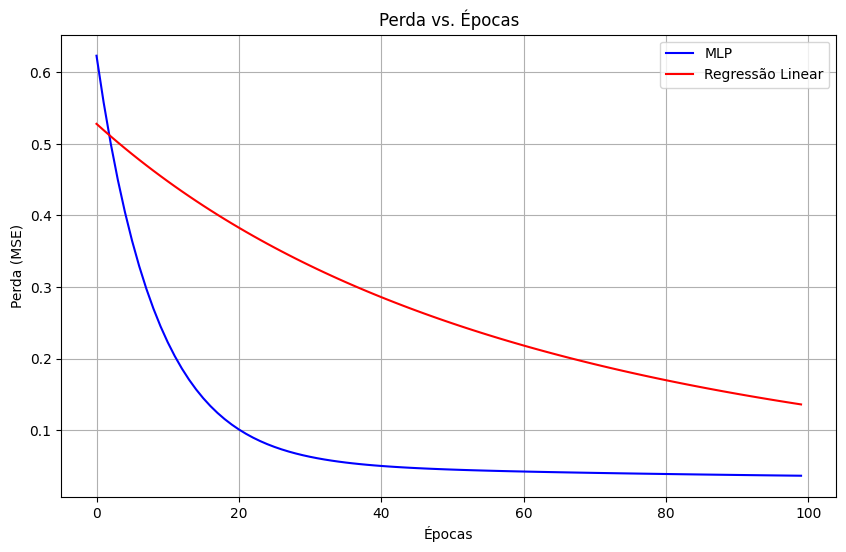

In [39]:
# Plota o histórico de perda
plt.figure(figsize=(10, 6))
plt.plot(historico_perda_mlp, label='MLP', color='blue')
plt.plot(historico_perda_linear, label='Regressão Linear', color='red')
plt.xlabel('Épocas')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.title('Perda vs. Épocas')
plt.grid(True)
plt.show()

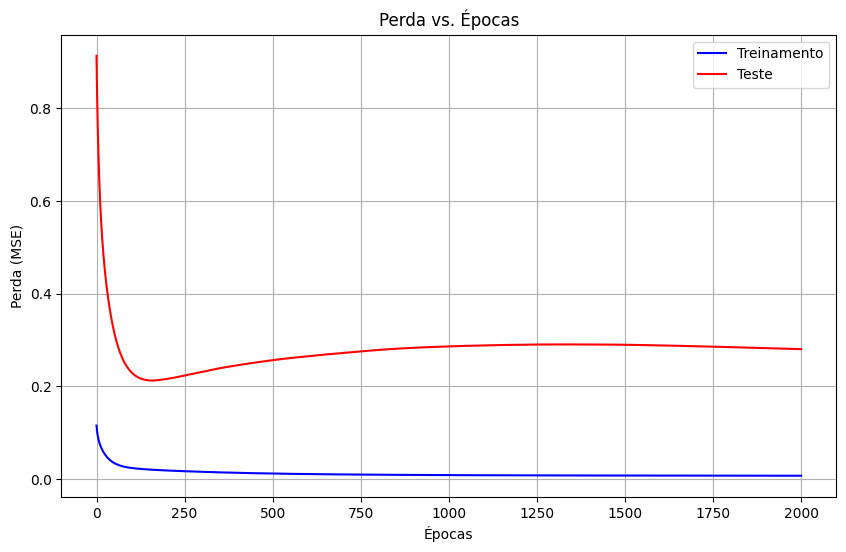

In [41]:
# Gera dados sintéticos baseados em uma função não-linear com ruído
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(3) + 0.3*torch.rand(x.size())

# Dividindo os dados em treinamento e teste
x_train = x[:80]
y_train = y[:80]
x_test = x[80:]
y_test = y[80:]

# Modelo MLP complexo
class MLPComplexo(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPComplexo, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.layers(x)

# Modelos
input_dim = 1
hidden_dim = 100
output_dim = 1
modelo_complexo = MLPComplexo(input_dim, hidden_dim, output_dim)

# Critério e otimizador
criterion = nn.MSELoss()
otimizador = torch.optim.SGD(modelo_complexo.parameters(), lr=0.01)

# Treina o modelo complexo
historico_perda_train = []
historico_perda_test = []
for epoch in range(2000):
    predicao_train = modelo_complexo(x_train)
    perda_train = criterion(predicao_train, y_train)

    otimizador.zero_grad()
    perda_train.backward()
    otimizador.step()

    historico_perda_train.append(perda_train.item())

    with torch.no_grad():
        predicao_test = modelo_complexo(x_test)
        perda_test = criterion(predicao_test, y_test)
        historico_perda_test.append(perda_test.item())

# Plota os resultados
plt.figure(figsize=(10, 6))
plt.plot(historico_perda_train, label='Treinamento', color='blue')
plt.plot(historico_perda_test, label='Teste', color='red')
plt.xlabel('Épocas')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.title('Perda vs. Épocas')
plt.grid(True)
plt.show()